In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split as tt
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
X, y = make_moons(n_samples=1200, noise=0.1, random_state=42)

## Dataset Visualization

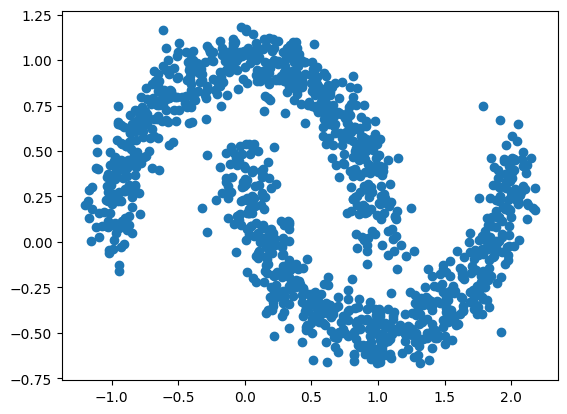

In [5]:
plt.scatter(X[:,0],X[:,1])

In [9]:
x_train,x_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=24)

## Implementing K means clustering on this dataset

C:\Users\Dell\AppData\Local\Temp\ipykernel_13972\189221650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13972\189221650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13972\189221650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\

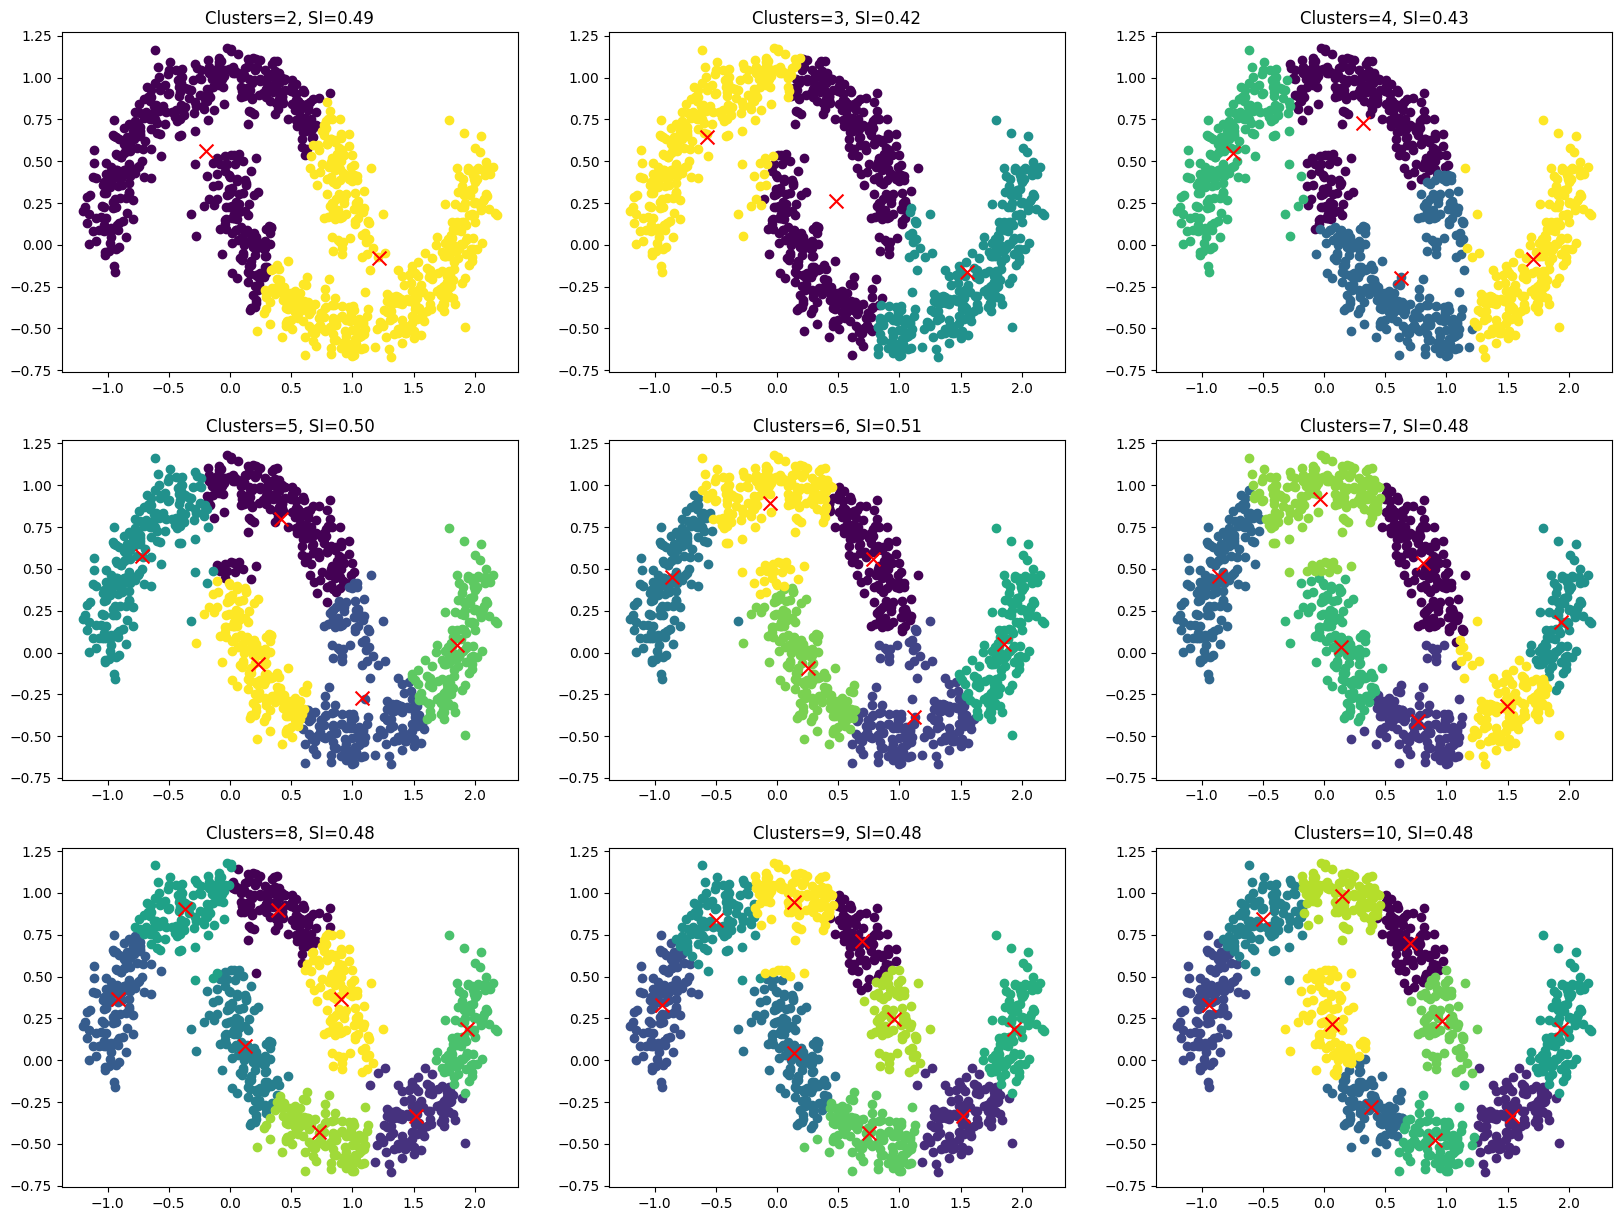

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
a = 0
b = 0
for i in range(2, 11):
    cmap = plt.cm.get_cmap('viridis', i)
    colors = [cmap(j) for j in range(i)] 
    
    k1 = KMeans(n_clusters=i, init='k-means++',max_iter=300, random_state=42)
    k1.fit(x_train)
    y1 = k1.predict(x_test)
    labels_train = k1.labels_ 
    
    
    if len(np.unique(y1)) > 1:
        si = silhouette_score(x_test, y1)
    else:
        si = None
    
    centroids = k1.cluster_centers_
    
    for cluster in range(i):
        mask = (labels_train == cluster)
        axes[a, b].scatter(x_train[mask, 0], x_train[mask, 1], color=colors[cluster], label=f'Cluster {cluster}')
    
    
    axes[a, b].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
    axes[a, b].set_title(f"Clusters={i}, SI={si:.2f}" if si else f"Clusters={i} (SI=NaN)")
    
    
    b += 1
    if b > 2:
        a += 1
        b = 0

In [13]:
distortions = []
inertias = []
mapping1 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = inertias[-1]

Distortion values:
1 : 1220.701933862987
2 : 497.2216729377239
3 : 331.2358111219736
4 : 220.3563107768421
5 : 169.25472040129623
6 : 119.66577708375691
7 : 98.13429495881235
8 : 75.74517557731912
9 : 63.43082187549984


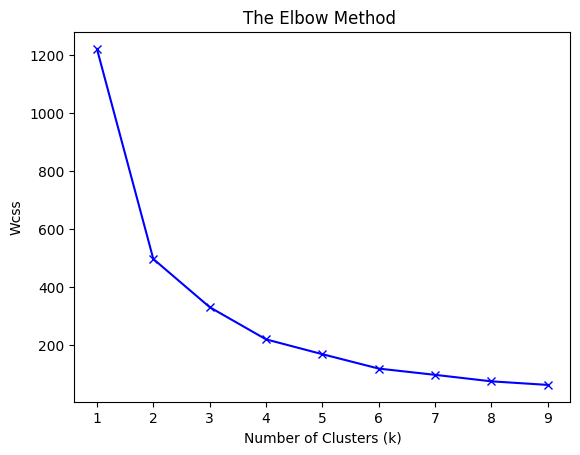

In [17]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Wcss')
plt.title('The Elbow Method ')
plt.show()

## from the visualization for 6 clusters the silhoutte score is the best

## Now lets Visualize the dataset using DBSCAN algorithm

In [23]:
from sklearn.cluster import DBSCAN

In [64]:
eps_values = (0.01,0.02,0.1,0.2)
min_samples_values = range(2,10)

best_score = -1
best_params = {}

# Manual grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        
        # Exclude noise points for scoring
        if len(set(labels)) > 1 and np.any(labels != -1):
            mask = labels != -1
            try:
                score = silhouette_score(X[mask], labels[mask])
                print(f"eps={eps:.2f}, min_samples={min_samples} => Silhouette Score: {score:.4f}")
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            except:
                continue

print(" Best Parameters:")
print(best_params)
print(f" Best Silhouette Score: {best_score:.4f}")

eps=0.01, min_samples=2 => Silhouette Score: 0.8767
eps=0.01, min_samples=3 => Silhouette Score: 0.9805
eps=0.02, min_samples=2 => Silhouette Score: 0.6688
eps=0.02, min_samples=3 => Silhouette Score: 0.7371
eps=0.02, min_samples=4 => Silhouette Score: 0.8136
eps=0.02, min_samples=5 => Silhouette Score: 0.9455
eps=0.02, min_samples=6 => Silhouette Score: 0.9327
eps=0.10, min_samples=2 => Silhouette Score: 0.3279
eps=0.10, min_samples=3 => Silhouette Score: 0.3279
eps=0.10, min_samples=4 => Silhouette Score: 0.3277
eps=0.10, min_samples=5 => Silhouette Score: 0.3279
eps=0.10, min_samples=6 => Silhouette Score: 0.3298
eps=0.10, min_samples=7 => Silhouette Score: 0.3301
eps=0.10, min_samples=8 => Silhouette Score: 0.3308
eps=0.10, min_samples=9 => Silhouette Score: 0.3363
 Best Parameters:
{'eps': 0.01, 'min_samples': 3}
 Best Silhouette Score: 0.9805


Silhouette Score (excluding noise): 0.326


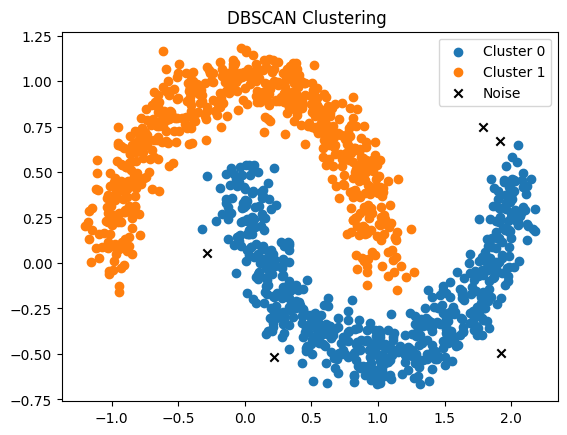

In [78]:
db = DBSCAN(eps=0.12, min_samples=5)
labels = db.fit_predict(X)

# Remove noise for silhouette score
mask = labels != -1
if len(set(labels[mask])) > 1:  # silhouette_score needs at least 2 clusters
    score = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")

# Unique labels
unique_labels = set(labels)

# Colormap
cmap = plt.colormaps.get_cmap('tab10')

# Plotting
for idx, k in enumerate(unique_labels):
    cluster_mask = (labels == k)
    xy = X[cluster_mask]
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], color=cmap(idx % 10), label=f'Cluster {k}')

plt.legend()
plt.title('DBSCAN Clustering ')
plt.show()

Silhouette Score (excluding noise): 0.980


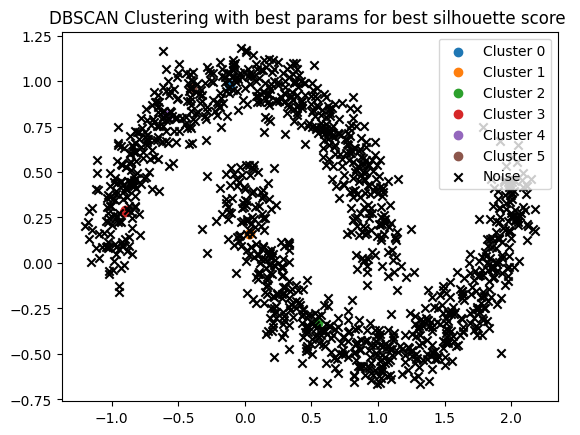

In [80]:
db = DBSCAN(eps=0.01, min_samples=3)
labels = db.fit_predict(X)

# Remove noise for silhouette score
mask = labels != -1
if len(set(labels[mask])) > 1:  # silhouette_score needs at least 2 clusters
    score = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")

# Unique labels
unique_labels = set(labels)

# Colormap
cmap = plt.colormaps.get_cmap('tab10')

# Plotting
for idx, k in enumerate(unique_labels):
    cluster_mask = (labels == k)
    xy = X[cluster_mask]
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], color=cmap(idx % 10), label=f'Cluster {k}')

plt.legend()
plt.title('DBSCAN Clustering with best params for best silhouette score ')
plt.show()

## We can conclude that for non-convex datasets DBSCAN gives much better clusters than that of kmeans. The silhouette score can be misleading in these type of dataset as the clustering with best score didnot give good clusters